In [1]:
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error as err
from sklearn.model_selection import train_test_split

D = load_iris()
df = DataFrame(data=D.data, columns=D.feature_names)

plt.scatter(df['petal length (cm)'].values, df['petal width (cm)'].values, c=D.target, cmap=plt.cm.coolwarm)
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
X_train, X_test, y_train, y_test = train_test_split(np.c_[df['petal length (cm)'].values, df['petal width (cm)'].values], D.target, test_size=.3, shuffle=True)

linear_model = LogisticRegression(solver='liblinear',multi_class='auto')
linear_model.fit(X_train, y_train)

print('Train error:', err(y_train, linear_model.predict(X_train)))
print('Test error:', err(y_test, linear_model.predict(X_test)))

Train error: 0.12380952380952381
Test error: 0.06666666666666667


In [3]:
X_train, X_test, y_train, y_test = train_test_split(np.c_[df['petal length (cm)'].values, df['petal width (cm)'].values], D.target, test_size=.3, shuffle=True)

model = MLPClassifier(max_iter=2500)
model.fit(X_train, y_train)

print('Train error:', err(y_train, model.predict(X_train)))
print('Test error:', err(y_test, model.predict(X_test)))

Train error: 0.0380952380952381
Test error: 0.044444444444444446


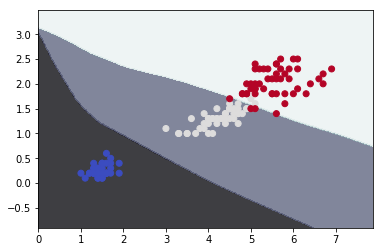

In [4]:
X = np.c_[df['petal length (cm)'].values, df['petal width (cm)'].values]

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.contourf(xx, yy, model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), cmap=plt.cm.bone, alpha=0.8)
plt.scatter(df['petal length (cm)'].values, df['petal width (cm)'].values, c=D.target, cmap=plt.cm.coolwarm)
plt.show()

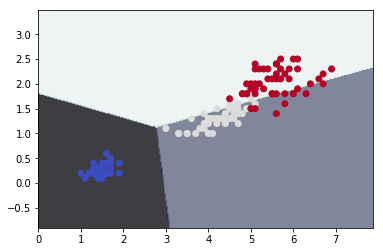

In [5]:
plt.contourf(xx, yy, linear_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), cmap=plt.cm.bone, alpha=0.8)
plt.scatter(df['petal length (cm)'].values, df['petal width (cm)'].values, c=D.target, cmap=plt.cm.coolwarm)
plt.show()